In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
speed_dating = pd.read_csv('Speed Dating Data.csv',encoding="latin-1")

# I'm going to get rid of waves 6-9 since they did their data differently...

speed_dating = speed_dating.loc[(speed_dating['wave'] < 6 )| (speed_dating['wave'] > 9 )]

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
print(speed_dating.shape)
print(speed_dating.iid.nunique())
speed_dating

(6816, 195)
449


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.00,20.00,20.00,20.00,0.00,5.00,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.00,0.00,0.00,40.00,0.00,0.00,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.00,18.00,19.00,18.00,14.00,12.00,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.00,5.00,15.00,40.00,5.00,

In [5]:
speed_dating1 = speed_dating[['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob' ]].dropna()

In [6]:
print(list(speed_dating.columns))

['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'de

In [7]:
speed_corr = speed_dating1.corr()
print(speed_corr.columns)
speed_corr

Index(['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob'], dtype='object')


,dec,attr,sinc,intel,fun,amb,shar,like,prob
dec,1.000000,0.482087,0.209686,0.217548,0.412354,0.181712,0.410840,0.514837,0.324679
attr,0.482087,1.000000,0.412567,0.388431,0.588267,0.351634,0.493096,0.669406,0.291238
sinc,0.209686,0.412567,1.000000,0.659325,0.516797,0.449294,0.400389,0.524811,0.334788
intel,0.217548,0.388431,0.659325,1.000000,0.507246,0.627527,0.402570,0.505386,0.273775
fun,0.412354,0.588267,0.516797,0.507246,1.000000,0.488373,0.620078,0.689162,0.395403
amb,0.181712,0.351634,0.449294,0.627527,0.488373,1.000000,0.428071,0.435519,0.270837
shar,0.410840,0.493096,0.400389,0.402570,0.620078,0.428071,1.000000,0.661168,0.476206
like,0.514837,0.669406,0.524811,0.505386,0.689162,0.435519,0.661168,1.000000,0.486695
prob,0.324679,0.291238,0.334788,0.273775,0.395403,0.270837,0.476206,0.486695,1.000000


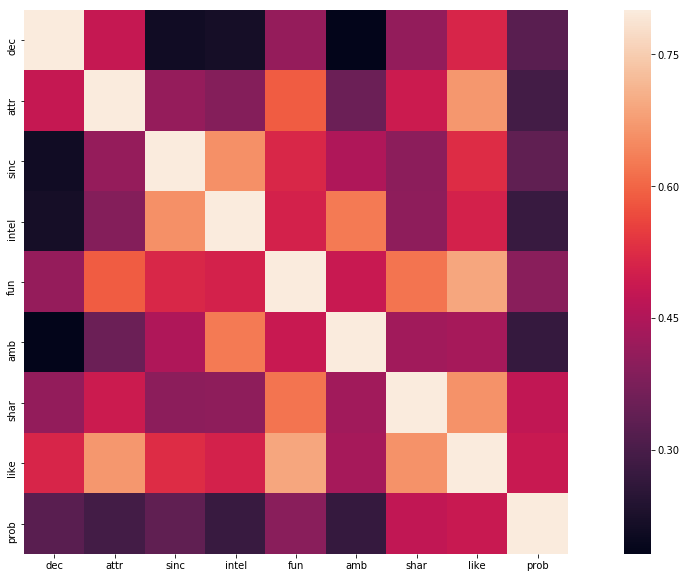

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(speed_corr, vmax=.8, square=True)
plt.show()

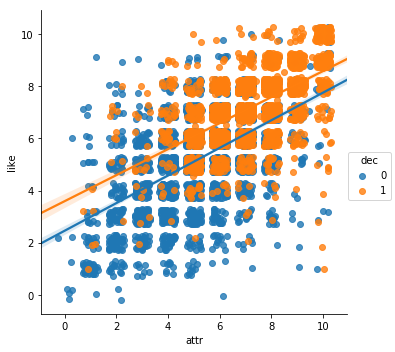

In [9]:
sns.lmplot(x="attr", y="like", data=speed_dating1, hue="dec",x_jitter=0.3, y_jitter=0.3)
plt.show()

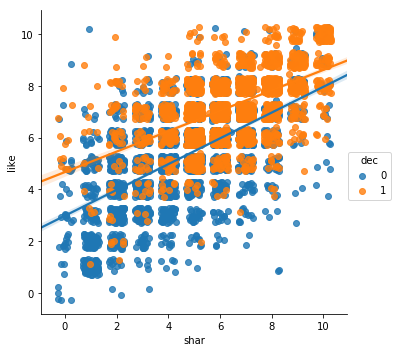

In [10]:
sns.lmplot(x="shar", y="like", data=speed_dating1, hue="dec",x_jitter=0.3, y_jitter=0.3)
plt.show()

[ 0.13796571 -0.4164486 ]


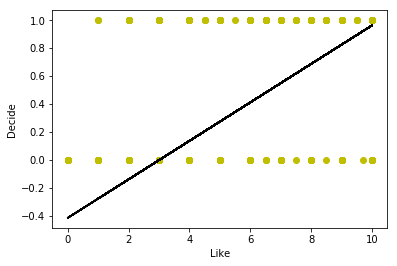

In [11]:
x = speed_dating1.like
y = speed_dating1.dec

# Calculate linear regression for x and bin_y.
fit = np.polyfit(x,y,1)

print(fit)

# Work as a function to return the predicted value of y.
fit_fn = np.poly1d(fit)

# Display our results.
plt.plot(x, y, 'yo', x, fit_fn(x), '--k')
plt.xlabel('Like')
plt.ylabel('Decide')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in long_scalars
  if __name__ == '__main__':


[ True  True  True  True  True  True  True  True  True  True  True  True
 False  True False  True False  True]
[  7.    6.    8.    5.    9.    4.   10.    2.    1.    3.    6.5   7.5
   8.5   0.    9.7]
[1.4669338677354709, 0.55541561712846343, 3.0091324200913241, 0.2064102564102564, 6.0499999999999998, 0.092269326683291769, 7.1333333333333337, 0.040540540540540543, 0.023809523809523808, 0.037593984962406013, 3.3333333333333335, 4.0, inf, 6.0, inf, 0.0, inf, 0.0]
[1.4669338677354709, 0.55541561712846343, 3.0091324200913241, 0.2064102564102564, 6.0499999999999998, 0.092269326683291769, 7.1333333333333337, 0.040540540540540543, 0.023809523809523808, 0.037593984962406013, 3.3333333333333335, 4.0, 6.0, 0.0, 0.0]
[ 0.57385642 -1.20610049]


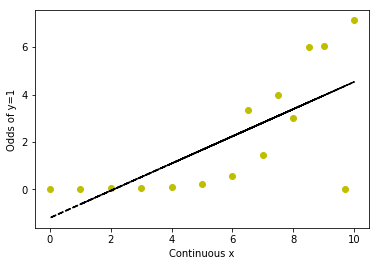

In [12]:
# Unique values in x.
xvals = x.unique()
# print(xvals)
# Calculate and store the odds.
yodds = []
for xi in xvals: 
    y1_ct = y[x == xi].sum()  # The number of trials y = 1.
    y0_ct = len(y[x == xi]) - y1_ct  # The number of trials y = 0.
    yodds.append(y1_ct / y0_ct)  # Odds of getting y = 1 for xi.
    
# Calculate linear regression for x and yodds.
# print(list(xvals))


idx = np.isfinite(xvals) & np.isfinite(yodds)
print(idx)
print(xvals[idx])

print(yodds)

yodds = [num for num in yodds if num <= 10]


print(yodds)

xvals = xvals[idx]

fit = np.polyfit(xvals, yodds, 1)

print(fit)

# Work as a function to return the predicted value of yodds.
fit_fn = np.poly1d(fit)

# Display our work.

plt.plot(xvals, yodds, 'yo', xvals, fit_fn(xvals), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Odds of y=1')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


[  7.    6.    8.    5.    9.    4.   10.    2.    1.    3.    6.5   7.5
   8.5]
[ 0.38317442 -0.58803859  1.1016518  -1.57788955  1.80005827 -2.38304351
  1.96477863 -3.2054528  -3.73766962 -3.28091122  1.2039728   1.38629436
  1.79175947]
[ 0.75221532 -4.87984638]


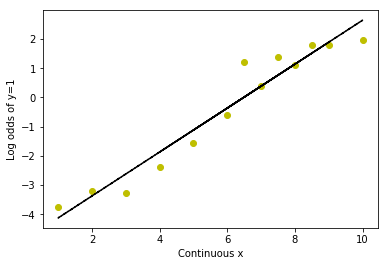

In [13]:
# Natural log of the odds.
ln_yodds = np.log(yodds)

xvals = xvals[:-2]
ln_yodds = ln_yodds[:-2]

# Calculate linear regression for x and yodds.
fit = np.polyfit(xvals, ln_yodds, 1)

print(xvals)
print(ln_yodds)

print(fit)
# Works as a function to return the predicted value of yodds.
fit_fn = np.poly1d(fit)

# Display.
plt.plot(xvals, ln_yodds, 'yo', xvals, fit_fn(xvals), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Log odds of y=1')

plt.show()

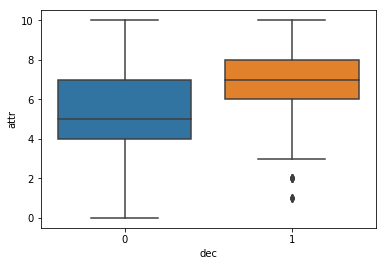

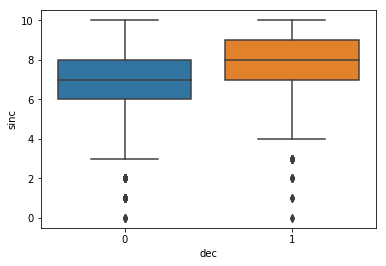

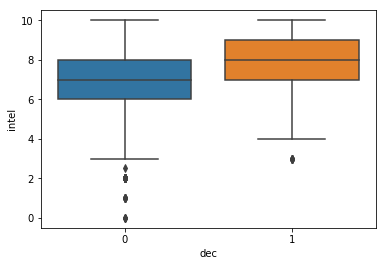

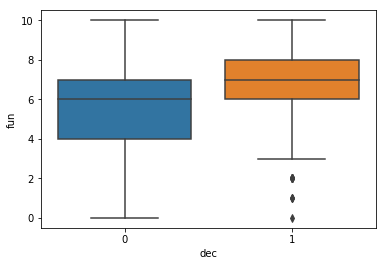

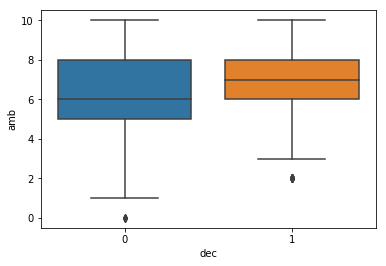

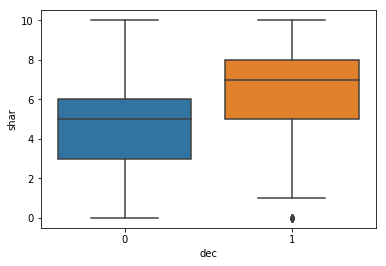

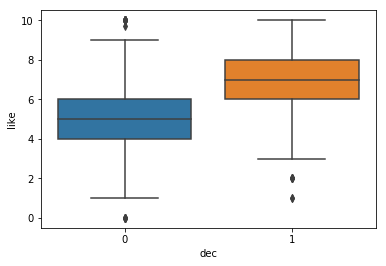

In [14]:
# Bivariate relationships of predictors to admissions outcome.
speed_dating1_columns = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like']

def make_scatter():
    for column in speed_dating1_columns:
        sns.boxplot(x="dec", y=column, data=speed_dating1)
        plt.show()

make_scatter()

# I find it interesting that there are people who scored 10s in each category and 
# yet they still weren't chosen.

In [15]:
speed_dating1_rankings = speed_dating1[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like']].corr()

           attr      sinc     intel       fun       amb      shar      like
attr   1.000000  0.412567  0.388431  0.588267  0.351634  0.493096  0.669406
sinc   0.412567  1.000000  0.659325  0.516797  0.449294  0.400389  0.524811
intel  0.388431  0.659325  1.000000  0.507246  0.627527  0.402570  0.505386
fun    0.588267  0.516797  0.507246  1.000000  0.488373  0.620078  0.689162
amb    0.351634  0.449294  0.627527  0.488373  1.000000  0.428071  0.435519
shar   0.493096  0.400389  0.402570  0.620078  0.428071  1.000000  0.661168
like   0.669406  0.524811  0.505386  0.689162  0.435519  0.661168  1.000000


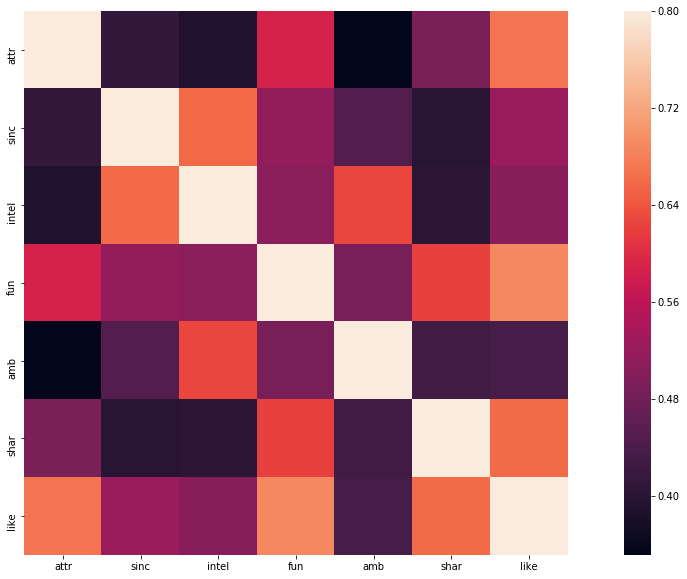

In [16]:
print(speed_dating1_rankings)

plt.figure(figsize=(20,10))
sns.heatmap(speed_dating1_rankings, vmax=.8, square=True)
plt.show()

In [17]:
# Declare predictors.
X_statsmod = speed_dating1[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like']]

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
X_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(speed_dating1['dec'], X_statsmod)
result = logit.fit()

# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.478382
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    dec   No. Observations:                 5684
Model:                          Logit   Df Residuals:                     5676
Method:                           MLE   Df Model:                            7
Date:                Mon, 06 Nov 2017   Pseudo R-squ.:                  0.2989
Time:                        07:57:03   Log-Likelihood:                -2719.1
converged:                       True   LL-Null:                       -3878.1
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
attr           0.3999      0.026     15.668      0.000       0.350       0.450
sinc          -0.1989      0.

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
# Calculate accuracy. First, get probability that each row will be admitted.
pred_statsmod = result.predict(X_statsmod)

# Code admission as 1 if probability is greater than .5.
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
table = pd.crosstab(speed_dating1['dec'], pred_y_statsmod)

print('\n Accuracy by decision status')
print(table)
print('\n Percentage accuracy')
print((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum()))


 Accuracy by decision status
col_0     0     1
dec              
0      2663   597
1       701  1723

 Percentage accuracy
0.771639690359


## Not sure what this does but it gives me the same results...

In [19]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(C=1e9)
y = speed_dating1['dec']
X = speed_dating1[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

Coefficients
[[ 0.39981791 -0.19887365 -0.00660571  0.15571854 -0.17983135  0.16807701
   0.58458069]]
[-5.80308613]

 Accuracy by admission status
dec       0     1
row_0            
0      2663   701
1       597  1723

 Percentage accuracy
0.771639690359


## I'm going to do the exact same thing without the 'like' feature...

In [20]:
# Declare predictors.
X_statsmod = speed_dating1[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']]

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
X_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(speed_dating1['dec'], X_statsmod)
result = logit.fit()

# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.506261
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    dec   No. Observations:                 5684
Model:                          Logit   Df Residuals:                     5677
Method:                           MLE   Df Model:                            6
Date:                Mon, 06 Nov 2017   Pseudo R-squ.:                  0.2580
Time:                        07:57:03   Log-Likelihood:                -2877.6
converged:                       True   LL-Null:                       -3878.1
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
attr           0.5382      0.024     22.376      0.000       0.491       0.585
sinc          -0.1239      0.

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
# Calculate accuracy. First, get probability that each row will be admitted.
pred_statsmod = result.predict(X_statsmod)

# Code admission as 1 if probability is greater than .5.
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
table = pd.crosstab(speed_dating1['dec'], pred_y_statsmod)

print('\n Accuracy by decision status')
print(table)
print('\n Percentage accuracy')
print((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum()))


 Accuracy by decision status
col_0     0     1
dec              
0      2625   635
1       789  1635

 Percentage accuracy
0.749472202674


## The percentage accuracy went down... So I guess I should leave it in...

In [22]:
import math
from sklearn import linear_model
from sklearn import preprocessing
sns.set_style('white')

In [23]:
speed_dating2 = speed_dating1[['dec','attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like']]

print(speed_dating2.head())

names = speed_dating2.columns

speed_dating2 = pd.DataFrame(preprocessing.scale(speed_dating2), columns=names)

print(speed_dating2.head())

trainsize = int(speed_dating2.shape[0] / 2)
df_test = speed_dating2.iloc[trainsize:, :].copy()
df_train = speed_dating2.iloc[:trainsize, :].copy()

# Set up the regression model to predict defaults using all other
# variables as features.
regr1 = linear_model.LinearRegression()
Y_train = df_train['dec'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['dec'])]
regr1.fit(X_train, Y_train)
print('\nR-squared simple model:')
print(regr1.score(X_train, Y_train))

#Store the parameter estimates.
origparams = np.append(regr1.coef_, regr1.intercept_)

# Test the simpler model with smaller coefficients.
Y_test = df_test['dec'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['dec'])]
print('\nR-squared simple model:')
print(regr1.score(X_test, Y_test))

   dec  attr  sinc  intel  fun  amb  shar  like
0    1   6.0   9.0    7.0  7.0  6.0   5.0   7.0
1    1   7.0   8.0    7.0  8.0  5.0   6.0   7.0
3    1   7.0   6.0    8.0  7.0  6.0   8.0   7.0
4    1   5.0   6.0    7.0  7.0  6.0   6.0   6.0
5    0   4.0   9.0    7.0  4.0  6.0   4.0   6.0
        dec      attr      sinc     intel       fun       amb      shar  \
0  1.159692 -0.078270  1.052254 -0.203603  0.323196 -0.398207 -0.183675   
1  1.159692  0.434923  0.489494 -0.203603  0.827880 -0.950730  0.275936   
2  1.159692  0.434923 -0.636026  0.432964  0.323196 -0.398207  1.195158   
3  1.159692 -0.591464 -0.636026 -0.203603  0.323196 -0.398207  0.275936   
4 -0.862298 -1.104657  1.052254 -0.203603 -1.190854 -0.398207 -0.643286   

       like  
0  0.482490  
1  0.482490  
2  0.482490  
3 -0.059362  
4 -0.059362  

R-squared simple model:
0.334706801282

R-squared simple model:
0.300886274483


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [24]:
# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced. Note that by convention, the
# intercept is not regularized. Since we standardized the data
# earlier, the intercept should be equal to zero and can be dropped.

ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))
origparams = ridgeregr.coef_[0]
print(origparams)

print(ridgeregr.score(X_test, Y_test))

0.334259339102
[ 0.24118546 -0.05844617 -0.00785001  0.06127193 -0.09865209  0.12523345
  0.32131038]
0.302264249666


## I made a realization since I did leave out some code where the curriculum was adding all of these randome features... It was throwing them in on purpose to see which features because the ridge regression would end up minimizing their influence if it didn't contribute to the model...

## So the ridge regression had R-squared values in the 30s... Let's see how a lasso regression does...

In [25]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)


R² for the model with few features:
0.166900266168

Parameter estimates for the model with few features:
[ 0.02271767  0.          0.          0.          0.          0.
  0.16640743 -0.02348911]


## Apparently it's even lower... hmmmm... Is this right Julie? lol